# Convert raw dataset into pytorch geometric dataset and save them

You can download the dataset from: 

### Datasets ids

* Training: 1-80
* Test 1: 501-520
* Test 2: 10001-10020
* Test 3: 15001-15010

In [9]:
from graph_creation import create_dataset_folders, create_grid_dataset, save_database

In [10]:
dataset_folder = '.\\raw_datasets'

simulation_ids = [
    ['grid','datasets/train', 1, 80, 64],
    ['grid','datasets/test', 500, 20, 64],
    ['random_breach_grid','datasets/test', 10001, 20, 64],
    ['big_random_breach_grid','datasets/test', 15001, 10, 128],
]

create_dataset_folders(dataset_folder='datasets')

In [11]:
for dataset_name, dataset_dir, start_sim_id, n_sim, n_grids in simulation_ids:
    pyg_dataset = create_grid_dataset(dataset_folder, n_sim=n_sim, start_sim=start_sim_id, number_grids=n_grids)
    save_database(pyg_dataset, name=dataset_name, out_path=dataset_dir)

  6%|▋         | 5/80 [00:00<00:10,  6.84it/s]


KeyboardInterrupt: 

This is how a sample of the dataset will look like:

In [ ]:
pyg_dataset[0]

Data(edge_index=[2, 65024], edge_distance=[65024], edge_slope=[65024], edge_relative_distance=[65024, 2], num_nodes=16384, pos=[16384, 2], DEM=[16384], WD=[16384, 241], VX=[16384, 241], VY=[16384, 241])

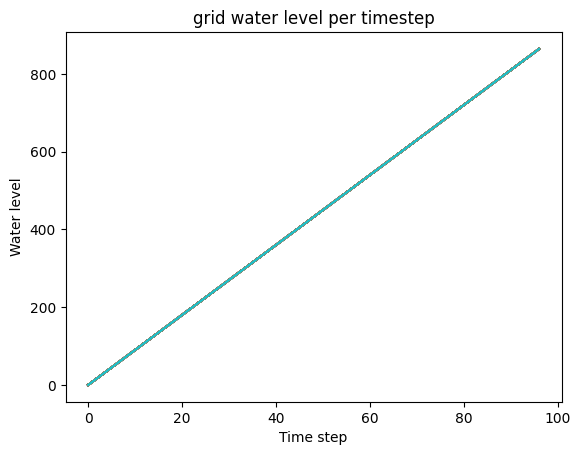

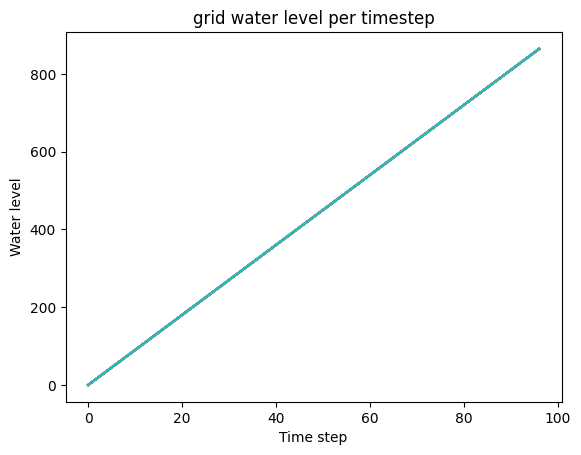

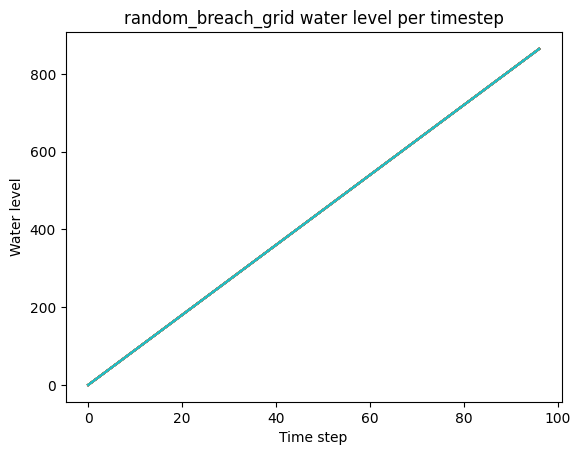

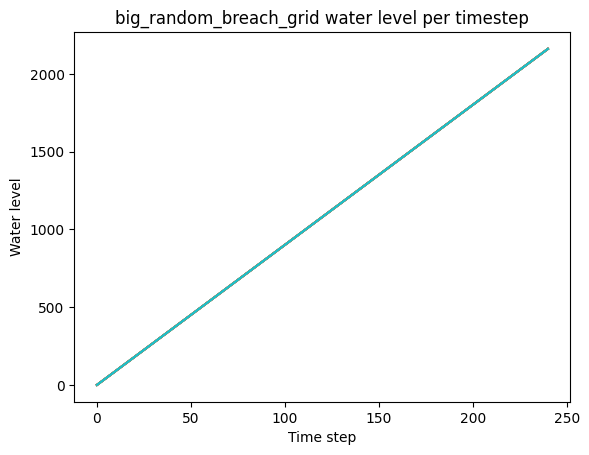

In [14]:
import pickle
import matplotlib.pyplot as plt

def load_dataset(dataset_name, dataset_folder):
    path = f"{dataset_folder}/{dataset_name}.pkl"
    
    with open(path, 'rb') as file:
        dataset = pickle.load(file)

    return dataset

train_grid_dataset = load_dataset('grid', 'datasets/train')
test_grid_dataset = load_dataset('grid', 'datasets/test')
random_breach_grid_dataset = load_dataset('random_breach_grid', 'datasets/test')
big_random_breach_grid_dataset = load_dataset('big_random_breach_grid', 'datasets/test')

for dataset_name, dataset_dir, _, _, _ in simulation_ids:
    dataset = load_dataset(dataset_name, dataset_dir)
    for graph in dataset:
        total_wd_per_ts = graph.WD.sum(axis=0)
        plt.plot(total_wd_per_ts)
        plt.title(f'{dataset_name} water level per timestep')
        plt.xlabel('Time step')
        plt.ylabel('Water level')
    plt.show()